# Wearable Device Dataset from Induced Stress and Structured Exercise Sessions

This Jupyter Notebook presents the recorded data from the Empatica E4 wristband during structured protocols designed to induce stress, and during aerobic and anaerobic exercise sessions. The signals displayed include:
 
·BVP (Blood Volume Pulse): Adimensional 

·TEMP (Skin Temperature): Measured in degrees Celsius [°C] Celsius 

·HR (Heart Rate): Measured in beats per minute [bpm] 

·EDA (Electrodermal activity): Measured in microsiemens [*μS*]

·ACC (Accelerometer Data): Filtered using a moving average. The accelerometer measures acceleration in the range of [-2g, 2g], with the unit in the ACC.csv file being 1/64g.
 
The x-axis represents time in seconds.

The graphics representing the protocols are also displayed. The times when participants pressed the wristband button are indicated above the protocol timeline. These correspond to the timestamps in the "tags.csv" file. The protocols are summarized as follows:

- Stress* version 1: 12 tags
- Stress* version 2: 9 tags
- Aerobic version 1: 12 tags
- Aerobic version 2: 8 tags
- Anaerobic version 1: 7 tags
- Anaerobic version 2: 11 tags

**Across the timeline, moments when participants reported their self-perceived stress levels (SL) are indicated in red.* 

# Before starting

1) Download the Folder and Files:

Download the folder *'Wearable_Dataset'* and the files *'Stress_Level_v1.csv'* and *'Stress_Level_v2.csv'*.

2) Replace File Paths:

After downloading, ensure you replace the file paths in the Jupyter Notebook with the correct paths on your local PC. This will allow the Notebook to access the data files correctly.

In [ ]:
dataset_path='/Users/levsah/Desktop/UCSDCourses/DSC180A/ResearchExp/wearabledata/three_sets' #replace the folder path 

strees_level_v1_path='/Users/levsah/Desktop/UCSDCourses/DSC180A/ResearchExp/wearabledata/Stress_Level_v1.csv'#replace the file path
strees_level_v2_path='/Users/levsah/Desktop/UCSDCourses/DSC180a-Capstone/wearabledata/Stress_Level_v2.csv'#replace the file path

3) Install and Import Required Libraries

Before running the Notebook, ensure you have the following Python libraries installed: numpy, pandas, matplotlib, datetime, os. After installing the necessary libraries, import then as follows:


In [ ]:
import pandas as pd
import os
import numpy as np
import datetime
import matplotlib.pyplot as plt


## Stress Induction Protocol

### First version (S01 to S18)

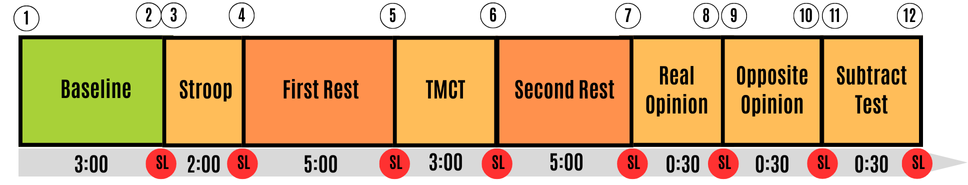

### Second version (f01 to f18)

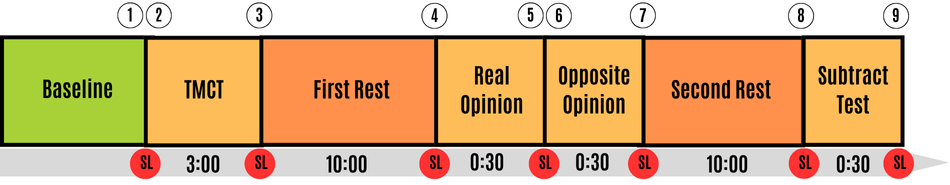

## Aerobic Protocol

### First version (S01 to S18)

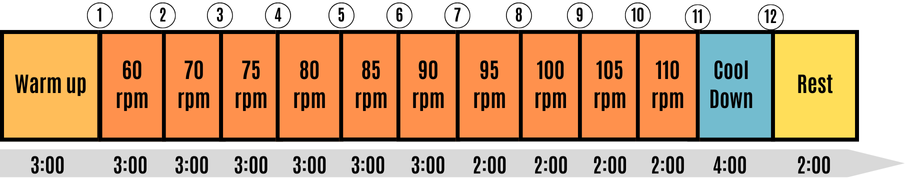

### Second version (f01 to f13)

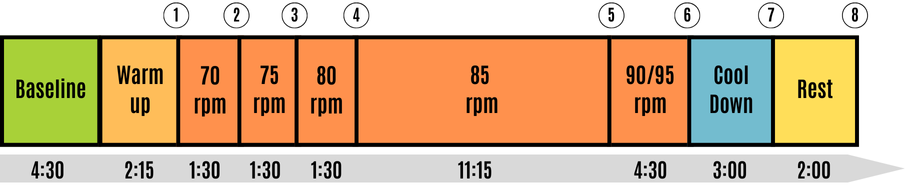

## Anaerobic Protocol

### First version (S01 to S18)

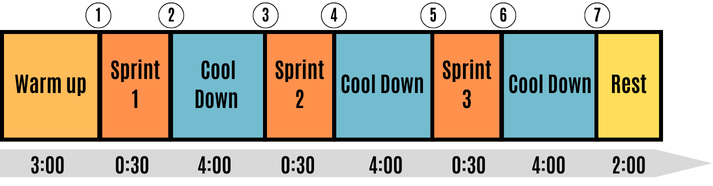

### Second version (f01 to f13)

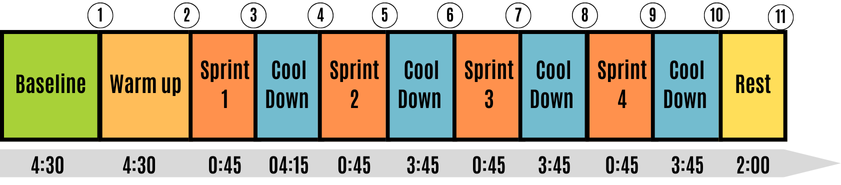

# Open and read signals

## Functions

In [ ]:
def moving_average(acc_data):
    # Initialization of variables
    avg = 0
    prevX, prevY, prevZ = 0, 0, 0
    results = []
    # Each second (32 samples) the acceleration data is summarized using the following method:
    for i in range(0, len(acc_data), 32):
        sum_ = 0
        buffX = acc_data[i:i+32, 0]
        buffY = acc_data[i:i+32, 1]
        buffZ = acc_data[i:i+32, 2]
        
        for j in range(len(buffX)):
            sum_ += max(
                abs(buffX[j] - prevX),
                abs(buffY[j] - prevY),
                abs(buffZ[j] - prevZ)
            )
            prevX, prevY, prevZ = buffX[j], buffY[j], buffZ[j]
        #The output is then filtered:
        avg = avg * 0.9 + (sum_ / 32) * 0.1 #
        results.append(avg)
    
    return results

In [ ]:
def graph_multiple(signals,timeline,subject_signals,state):

    plt.figure(figsize=(25,15))

    keys = list(signals[subject_signals].keys())
    keys.remove("tags")

    i=1
    
    for key in keys:
        plt.subplot(len(keys),1,i)
        if i==1:
            plt.title(subject_signals + "  -  "+state)
        if key=='ACC':
            acc=moving_average(signals[subject_signals][key])
            plt.plot(acc,label=key)
        else:
            plt.plot(timeline[subject_signals][key],signals[subject_signals][key],label=key)
        
        for tag in signals[subject_signals]["tags"][1:]:
            plt.axvline(x=tag, color='r', linestyle='-')

        if state=='STRESS' and signals[subject_signals]["tags"]:
            if 'S' in subject_signals: #first version
                plt.axvspan(signals[subject_signals]["tags"][3], signals[subject_signals]["tags"][4], color='red', alpha=0.2) #stroop
                plt.axvspan(signals[subject_signals]["tags"][5], signals[subject_signals]["tags"][6], color='red', alpha=0.2)# tmct
                plt.axvspan(signals[subject_signals]["tags"][7], signals[subject_signals]["tags"][8], color='red', alpha=0.2)#real opinion
                plt.axvspan(signals[subject_signals]["tags"][9], signals[subject_signals]["tags"][10], color='red', alpha=0.2)#opposite opinion
                plt.axvspan(signals[subject_signals]["tags"][11], signals[subject_signals]["tags"][12], color='red', alpha=0.2)#subtract test

            else: #second version
                plt.axvspan(signals[subject_signals]["tags"][2], signals[subject_signals]["tags"][3], color='red', alpha=0.2) #tmct
                plt.axvspan(signals[subject_signals]["tags"][4], signals[subject_signals]["tags"][5], color='red', alpha=0.2)#real opinion
                plt.axvspan(signals[subject_signals]["tags"][6], signals[subject_signals]["tags"][7], color='red', alpha=0.2)#opposite opinion
                plt.axvspan(signals[subject_signals]["tags"][8], signals[subject_signals]["tags"][9], color='red', alpha=0.2)#subtract test
        
        plt.legend()
        plt.grid()
        i = i+1  
    plt.show()

In [ ]:
# create a vector from the data frame (signal imported by pandas)
def create_df_array(dataframe):
    matrix_df=dataframe.values
    # returns 2-d matrix
    matrix = np.array(matrix_df)
    array_df = matrix.flatten()# Convert matrix into an array
    return array_df

# convert UTC arrays to arrays in seconds relative to 0 (record beginning)
def time_abs_(UTC_array):
    new_array=[]
    for utc in UTC_array:
        time=(datetime.datetime.strptime(utc,'%Y-%m-%d %H:%M:%S')-datetime.datetime.strptime(UTC_array[0], '%Y-%m-%d %H:%M:%S')).total_seconds()
        new_array.append(int(time))
    return new_array

In [ ]:
def read_signals(main_folder):
    signal_dict = {}
    time_dict = {}
    fs_dict = {}

    # Get a list of subfolders in the main folder
    subfolders = next(os.walk(main_folder))[1]

    utc_start_dict={}
    for folder_name in subfolders:
            csv_path = f'{main_folder}/{folder_name}/EDA.csv'
            df=pd.read_csv(csv_path)
            utc_start_dict[folder_name]= df.columns.tolist()

    # Iterate over the subfolders
    for folder_name in subfolders:
        folder_path = os.path.join(main_folder, folder_name)
        # Get a list of files in the subfolder
        files = os.listdir(folder_path)

        # Initialize a dictionary for the signals in the current subfolder
        signals = {}
        time_line = {}
        fs_signal= {}
        
        # Define the list of desired file names
        desired_files = ['EDA.csv', 'BVP.csv', 'HR.csv', 'TEMP.csv','tags.csv','ACC.csv']
   
        # Iterate over the files in the subfolder
        for file_name in files:
            file_path = os.path.join(folder_path, file_name)

            # Check if it's a CSV file and if it is in the desired files list
            if file_name.endswith('.csv') and file_name in desired_files:
                # Read the CSV file and store the signal data

                if file_name == 'tags.csv':
                    try:
                        df = pd.read_csv(file_path,header=None)
                        tags_vector = create_df_array(df)
                        tags_UTC_vector =np.insert(tags_vector,0,utc_start_dict[folder_name])
                        signal_array=time_abs_(tags_UTC_vector)
                    except pd.errors.EmptyDataError:
                        signal_array=[]
                
                else:
                    df = pd.read_csv(file_path)
                    fs= df.loc[0]
                    fs=int(fs[0])# Get sampling frequency
                    df.drop([0],axis = 0,inplace=True) 
                    signal_array = df.values
                    time_array = np.linspace(0, len(signal_array)/fs,len(signal_array))

                signal_name = file_name.split('.')[0]
                signals[signal_name] = signal_array
                time_line[signal_name] = time_array
                fs_signal[signal_name] = fs

        # Store the signals of the current subfolder in the main dictionary
        signal_dict[folder_name] = signals
        time_dict[folder_name] = time_line
        fs_dict[folder_name] = fs_signal

    return signal_dict, time_dict, fs_dict


## Read and save signals 

In [ ]:
states = [d for d in os.listdir(dataset_path) 
          if os.path.isdir(os.path.join(dataset_path, d))] #['AEROBIC', 'ANAEROBIC', 'STRESS']

signal_data={}
time_data={}
fs_dict={}
participants={}

for state in states:
    folder_path = f'{dataset_path}/{state}' 
    participants[state] = [
        p for p in os.listdir(folder_path)
        if os.path.isdir(os.path.join(folder_path, p))
    ]
    signal_data[state], time_data[state], fs_dict[state] =read_signals(folder_path) # Returns three dictionaries with subjects info: raw signals (signal_data), temporal data ready to graph (time_data) and sample frequency for escha signal(fs_dict).

# Visualize signals

## STRESS

In [ ]:
for person in participants['STRESS']:
    graph_multiple(signal_data['STRESS'],time_data['STRESS'],person,'STRESS')

## AEROBIC

In [ ]:
state='AEROBIC'
for person in participants[state]:
    graph_multiple(signal_data[state],time_data[state],person,state)

## ANAEROBIC

In [ ]:
state='ANAEROBIC'
for person in participants[state]:
    graph_multiple(signal_data[state],time_data[state],person,state)

# Working with self reported stress level

In [ ]:
stress_level_v1=pd.read_csv(strees_level_v1_path,index_col=0)
stress_level_v2=pd.read_csv(strees_level_v2_path,index_col=0)

## Stress Level v1

### Stress Level for all participants

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 8))

for index, row in stress_level_v1.iterrows():
    plt.plot(stress_level_v1.columns, row, marker='o', label=index)

plt.title('Self Reported Stress Level - All Participants V1 ')
plt.xlabel('Tests')
plt.ylabel('Stress Level')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Average Stress Level for all participants

In [ ]:
mean_stress_levels = stress_level_v1.mean()

plt.figure(figsize=(10, 6))
mean_stress_levels.plot(kind='bar', color='skyblue')
plt.title('Mean Self Reported Stress Level - All Participants V1 ')
plt.xlabel('Tests')
plt.ylabel('Stress Level')
plt.show()

### Stress Level for one subject

In [ ]:
subject = 'S01'  # Replace with subject ID

subject_data = stress_level_v1.loc[subject]

plt.figure(figsize=(10, 6))
plt.plot(subject_data.index, subject_data.values, marker='o', linestyle='-', color='b')

plt.title(f'Self Reported Stress Level for {subject} - v1')
plt.xlabel('Tests')
plt.ylabel('Stress Level')
plt.grid(True)
plt.show()

## Stress Level v2

### Stress Level for all participants

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(14, 8))

for index, row in stress_level_v2.iterrows():
    plt.plot(stress_level_v2.columns, row, marker='o', label=index)

plt.title('Self Reported Stress Level - All Participants V2 ')
plt.xlabel('Tests')
plt.ylabel('Stress Level')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Average Stress Level for all participants

In [ ]:

mean_stress_levels = stress_level_v2.mean()

plt.figure(figsize=(10, 6))
mean_stress_levels.plot(kind='bar', color='skyblue')
plt.title('Mean Self Reported Stress Level - All Participants V2 ')
plt.xlabel('Tests')
plt.ylabel('Stress Level')
plt.show()

### Stress Level for one subject

In [ ]:
subject = 'f05'  # Replace with dubject ID

subject_data = stress_level_v2.loc[subject]

plt.figure(figsize=(10, 6))
plt.plot(subject_data.index, subject_data.values, marker='o', linestyle='-', color='b')

plt.title(f'Self Reported Stress Level for {subject}- v2')
plt.xlabel('Tests')
plt.ylabel('Stress Level')
plt.grid(True)
plt.show()